In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(root='data',train=True,download=True,transform=ToTensor())

26422272it [00:01, 19539617.00it/s]                              


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



29696it [00:00, 3873069.80it/s]          

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



4422656it [00:00, 18746899.94it/s]                             


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



6144it [00:00, ?it/s]                   

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw




D:\software\anaconda\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
test_data = datasets.FashionMNIST(root='data',train=False,download=True,transform=ToTensor())

In [4]:
labels_map = {0:'shirt',1:'trouser',2:'pullover',3:'dress',4:'coat',5:"sandal",6:'shirt',7:'sneak',8:'bag',9:'ankle boot'}

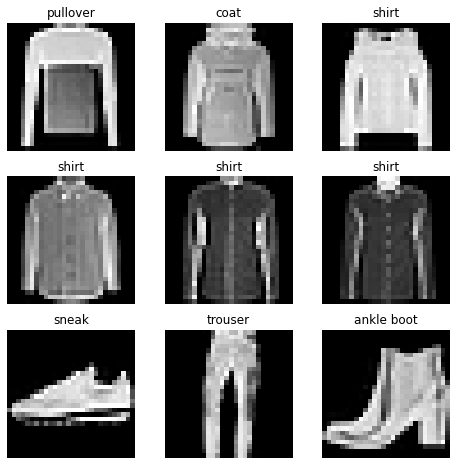

In [12]:
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
for i in range(1,cols*rows+1):
    sample_index = torch.randint(len(training_data),size = (1,)).item()
    img ,label = training_data[sample_index]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(),cmap='gray')


In [13]:
import os
import pandas as pd
from torchvision.io import read_image

In [14]:
class Custimagedataset(Dataset):
    def __init__(self,annotations_file,img_dir,transform = None,targe_transform = None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = targe_transform
    def __len__(self):
        return len(self.img_labels)
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform :
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

In [15]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data,batch_size = 64,shuffle = True)
Test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)


tensor(7)

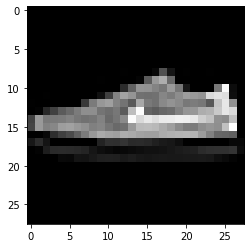

In [24]:
train_features,train_label = next(iter(train_dataloader))
train_features.size()
train_label.size()
img = train_features[0].squeeze()
label = train_label[0]
plt.imshow(img,cmap='gray')
label

In [25]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda

In [26]:
ds = datasets.FashionMNIST(root='data',train=True,download=True,transform=ToTensor,target_transform=Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1)))

In [27]:
import os 
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [28]:
if torch.cuda.is_available():
    device = 'cuda'

In [29]:
device

'cuda'

In [34]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10))
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [35]:
model = Net()

In [36]:
model = model.to(device)

In [37]:
model

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [38]:
x  = torch.rand(1,28,28,device=device)
logits = model(x)
pred_pro = nn.Softmax(dim=1)(logits)
y_pred = pred_pro.argmax(1)

In [39]:
y_pred

tensor([1], device='cuda:0')

In [41]:
input_img = torch.rand(3,28,28)
input_img

tensor([[[0.0440, 0.2483, 0.3801,  ..., 0.9964, 0.8484, 0.9636],
         [0.9903, 0.6298, 0.0765,  ..., 0.4051, 0.1082, 0.5059],
         [0.0321, 0.8689, 0.0229,  ..., 0.0477, 0.9781, 0.3462],
         ...,
         [0.9498, 0.6924, 0.6373,  ..., 0.1891, 0.5867, 0.6290],
         [0.8910, 0.5163, 0.6427,  ..., 0.5133, 0.3569, 0.7798],
         [0.6754, 0.8345, 0.2539,  ..., 0.5961, 0.0680, 0.0522]],

        [[0.4678, 0.0428, 0.7236,  ..., 0.3811, 0.5056, 0.8634],
         [0.5815, 0.3287, 0.7750,  ..., 0.0051, 0.3276, 0.8715],
         [0.4851, 0.1416, 0.6249,  ..., 0.0467, 0.6030, 0.4475],
         ...,
         [0.1960, 0.7679, 0.8348,  ..., 0.7172, 0.8341, 0.4912],
         [0.2549, 0.7600, 0.7107,  ..., 0.2217, 0.3902, 0.6115],
         [0.0040, 0.5386, 0.8519,  ..., 0.0779, 0.9663, 0.7905]],

        [[0.9298, 0.9284, 0.0891,  ..., 0.6429, 0.4447, 0.1588],
         [0.8929, 0.9257, 0.9322,  ..., 0.3485, 0.6151, 0.7728],
         [0.3269, 0.0111, 0.1014,  ..., 0.9252, 0.2762, 0.

In [42]:
flatten = nn.Flatten()
flatten_img  = flatten(input_img)
flatten_img

tensor([[0.0440, 0.2483, 0.3801,  ..., 0.5961, 0.0680, 0.0522],
        [0.4678, 0.0428, 0.7236,  ..., 0.0779, 0.9663, 0.7905],
        [0.9298, 0.9284, 0.0891,  ..., 0.0561, 0.0685, 0.8075]])

In [44]:
flatten_img.size()

torch.Size([3, 784])

In [45]:
layer1 = nn.Linear(28*28,20)
hid1 = layer1(flatten_img)
hid1

tensor([[ 0.1387, -0.4685, -0.4470,  0.1804, -0.2555, -0.1115,  0.1403, -0.0181,
          0.6921,  0.3822,  0.3241, -0.3990,  0.2316,  0.3218,  0.0478,  0.2395,
          0.1992,  0.1743, -0.3121,  0.2875],
        [ 0.0704, -0.4013, -0.0026,  0.4367, -0.0995, -0.0371,  0.1132,  0.2837,
          0.2144,  0.4239,  0.4036, -0.4943,  0.3792, -0.0435, -0.1187,  0.0896,
          0.1373,  0.0925, -0.6023,  0.3963],
        [ 0.1139, -0.1517, -0.1071,  0.2093,  0.0418,  0.1878, -0.0266,  0.0246,
         -0.1117,  0.6753,  0.0976, -0.1920,  0.1101,  0.3791, -0.0383,  0.0062,
          0.3119,  0.1110, -0.4252,  0.3269]], grad_fn=<AddmmBackward>)

In [46]:
hid1.size()

torch.Size([3, 20])

In [47]:
relu1 = nn.ReLU()
hid2 =relu1(hid1)
hid2

tensor([[0.1387, 0.0000, 0.0000, 0.1804, 0.0000, 0.0000, 0.1403, 0.0000, 0.6921,
         0.3822, 0.3241, 0.0000, 0.2316, 0.3218, 0.0478, 0.2395, 0.1992, 0.1743,
         0.0000, 0.2875],
        [0.0704, 0.0000, 0.0000, 0.4367, 0.0000, 0.0000, 0.1132, 0.2837, 0.2144,
         0.4239, 0.4036, 0.0000, 0.3792, 0.0000, 0.0000, 0.0896, 0.1373, 0.0925,
         0.0000, 0.3963],
        [0.1139, 0.0000, 0.0000, 0.2093, 0.0418, 0.1878, 0.0000, 0.0246, 0.0000,
         0.6753, 0.0976, 0.0000, 0.1101, 0.3791, 0.0000, 0.0062, 0.3119, 0.1110,
         0.0000, 0.3269]], grad_fn=<ReluBackward0>)

In [50]:
for name,para in model.named_parameters():
    print(name)

linear_relu_stack.0.weight
linear_relu_stack.0.bias
linear_relu_stack.2.weight
linear_relu_stack.2.bias
linear_relu_stack.4.weight
linear_relu_stack.4.bias


In [51]:
import torch

In [52]:
x  =  torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3,requires_grad=True)
b = torch.randn(3,requires_grad=True)
z = torch.matmul(x,w) +b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [53]:
loss

tensor(0.4461, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [54]:
z.grad_fn

In [55]:
loss.grad_fn

In [56]:
loss.backward()

In [57]:
w.grad

tensor([[0.0025, 0.0087, 0.2429],
        [0.0025, 0.0087, 0.2429],
        [0.0025, 0.0087, 0.2429],
        [0.0025, 0.0087, 0.2429],
        [0.0025, 0.0087, 0.2429]])

In [58]:
b.grad

tensor([0.0025, 0.0087, 0.2429])

In [60]:
w

tensor([[-1.2566, -0.7034, -1.1299],
        [-0.0914, -0.7989, -0.0845],
        [-0.4011, -1.8697,  0.7856],
        [ 0.3078,  0.6165,  1.0494],
        [-2.6073,  0.0537,  0.5169]], requires_grad=True)

In [61]:
b

tensor([-0.8374, -0.9143, -0.1498], requires_grad=True)

## 禁止梯度跟踪

In [62]:
z = torch.matmul(x,w)+b

In [63]:
z.requires_grad

True

In [64]:
with torch.no_grad():
    z = torch.matmul(x,w)+b
z

tensor([-4.8859, -3.6161,  0.9877])

In [65]:
z.requires_grad

False

In [67]:
#这种方法也可以防止梯度跟踪
z = torch.matmul(x,w)+b
z_det = z.detach()
z_det.requires_grad

False

In [82]:
inp =  torch.eye(5,requires_grad=True)
inp

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], requires_grad=True)

In [83]:
out = (inp+1).pow(2)
out

tensor([[4., 1., 1., 1., 1.],
        [1., 4., 1., 1., 1.],
        [1., 1., 4., 1., 1.],
        [1., 1., 1., 4., 1.],
        [1., 1., 1., 1., 4.]], grad_fn=<PowBackward0>)

In [84]:
out.backward(torch.ones_like(inp),retain_graph=True)
inp.grad

tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

In [85]:
out.backward(torch.ones_like(inp),retain_graph=True)
inp.grad

tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

In [86]:
inp.grad.zero_()
out.backward(torch.ones_like(inp),retain_graph=True)
inp.grad

tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

模型训练

In [104]:
training_data = datasets.FashionMNIST(root='data',train=True,download=True,transform=ToTensor())

In [126]:
test_data = datasets.FashionMNIST(root='data',train=False,download=True,transform=ToTensor())

In [127]:
train_dataloader = DataLoader(training_data,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)


In [106]:
model = Net()

In [107]:
model

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [143]:
#定义超参数
learning_rate = 1e-3
batch_size =64
epoch = 40

In [109]:
#定义损失函数
loss_fn = nn.CrossEntropyLoss()

In [110]:
#定义优化器
opt = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [137]:
def train_loop(dataloader,model,loss_fn,opt):
    size  = len(dataloader.dataset)
    for batch,(x,y) in enumerate(dataloader):
        pred = model(x)
        loss = loss_fn(pred,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        if batch % 100 ==0:
            loss,current = loss.item(),batch*len(x)
            print(f'loss:{loss:>7f}  [{current:>5d}/{size:>5d}]')

In [145]:
def test_loop(dataloader,model,loss_fn):
    size = len(dataloader)
    num_batches = len(dataloader)
    test_loss ,correct = 0,0
    with torch.no_grad():
        for x,y in dataloader:
            pred = model(x)
            test_loss += loss_fn(pred,y).item()
            correct +=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /=num_batches
    correct /=size
    print(f"test_error: \n accuracy: {(correct):>0.1f}%, avg loss: {test_loss:>8f}")

In [146]:
for t in range(epoch):
    print(f'epoch {t+1}\n-----------')
    train_loop(train_dataloader,model,loss_fn,opt)
    test_loop(test_dataloader,model,loss_fn)
print('DONE')

epoch 1
-----------
loss:0.421647  [    0/60000]
loss:0.580728  [ 6400/60000]
loss:0.425872  [12800/60000]
loss:0.489915  [19200/60000]
loss:0.353148  [25600/60000]
loss:0.575104  [32000/60000]
loss:0.610281  [38400/60000]
loss:0.376492  [44800/60000]
loss:0.473571  [51200/60000]
loss:0.644434  [57600/60000]
test_error: 
 accuracy: 51.8%, avg loss: 0.535125
epoch 2
-----------
loss:0.845652  [    0/60000]
loss:0.526631  [ 6400/60000]
loss:0.493932  [12800/60000]
loss:0.476794  [19200/60000]
loss:0.687248  [25600/60000]
loss:0.537574  [32000/60000]
loss:0.518343  [38400/60000]
loss:0.375340  [44800/60000]
loss:0.374306  [51200/60000]
loss:0.699434  [57600/60000]
test_error: 
 accuracy: 51.8%, avg loss: 0.530304
epoch 3
-----------
loss:0.449233  [    0/60000]
loss:0.383715  [ 6400/60000]
loss:0.431806  [12800/60000]
loss:0.468291  [19200/60000]
loss:0.377543  [25600/60000]
loss:0.378487  [32000/60000]
loss:0.447187  [38400/60000]
loss:0.540738  [44800/60000]
loss:0.403142  [51200/60000]